<a href="https://colab.research.google.com/github/raviakasapu/DeepLearningPyTorch/blob/main/Deep_Learning_with_PyTorch_01_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning with PyTorch - Chapter 01

---


A simple Regression Problem



code examples from https://github.com/dvgodoy/PyTorchStepByStep/blob/master/Chapter01.ipynb

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

import torch
import torch.optim as optim
import torch.nn as nn


In [ ]:
#using and checking GPU with tensor flow 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()

In [ ]:
devices[1].name

'/device:GPU:0'

In [ ]:
# Install torchviz from git repository
%pip install -U git+https://github.com/szagoruyko/pytorchviz.git@master

  Cloning https://github.com/szagoruyko/pytorchviz.git (to revision master) to /tmp/pip-req-build-wdi6r6mv
  Running command git clone -q https://github.com/szagoruyko/pytorchviz.git /tmp/pip-req-build-wdi6r6mv
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4990 sha256=191e8f5d7ff6d4bf6b429a38e98703f7315a4697c04c400a6a0dc2c536ad65d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-93k0vnco/wheels/69/06/fd/652908d49c931cdcca96be3c727fb11ed777a3a62402210396
Successfully built torchviz


In [ ]:
from torchviz import make_dot

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from mpl_toolkits.mplot3d import Axes3D

In [ ]:
true_b = 1
true_w = 2

n= 100

#random data generation
np.random.seed(42)
x = np.random.rand(n,1)

e = (0.1 * np.random.randn(n,1))

# linear equation
y = true_b + true_w * x + e

In [ ]:
idx = np.arange(n)
np.random.shuffle(idx)

In [ ]:
train_idx = idx[:int(n*0.8)]
val_idx = idx[int(n*0.8):]

In [ ]:
# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

In [ ]:
def figure1(x_train, y_train, x_val, y_val):
    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    
    ax[0].scatter(x_train, y_train)
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_ylim([0, 3.1])
    ax[0].set_title('Generated Data - Train')

    ax[1].scatter(x_val, y_val, c='r')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].set_ylim([0, 3.1])
    ax[1].set_title('Generated Data - Validation')
    fig.tight_layout()
    
    return fig, ax

(<Figure size 1152x576 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f841a79afd0>,
       dtype=object))

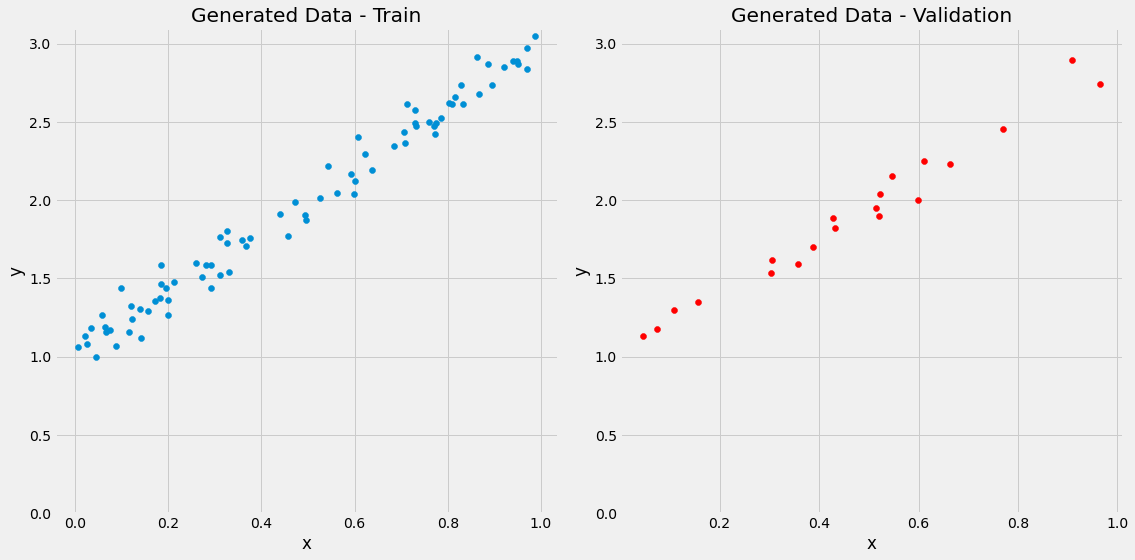

In [ ]:
figure1(x_train, y_train, x_val, y_val)

# step 0 --> random initialization

In [ ]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b,w)

[0.49671415] [-0.1382643]


# step 1 --> model's prediction

In [ ]:
yhat = b + w * x_train
yhat[0:5]

array([[0.390075  ],
       [0.4879263 ],
       [0.37737776],
       [0.4931996 ],
       [0.39550552]])

# step 2 --> compute the loss

In [ ]:
error = (yhat-y_train)

In [ ]:
loss = (error **2).mean()
loss

2.7421577700550976

# step 3 --> compute the gradients

In [ ]:
b_grad = 2 * error.mean()
w_grad = 2 * (x_train*error).mean()
b_grad,w_grad

(-3.044811379650508, -1.8337537171510832)

# step 4 --> updat the parameters

In [ ]:
lr = 0.1
print(b, w)

b = b -lr * b_grad
w = w- lr * w_grad
print(b,w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


# using a function and Numpy

In [ ]:
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b,w)

lr = 0.1
n_epochs = 1000

for epoch in range(n_epochs):
  yhat = b + w * x_train

  error = (yhat - y_train)
  loss = (error ** 2 ).mean()

  b_grad = 2 * error.mean()
  w_grad = 2 * (x_train * error).mean()

  b = b - lr * b_grad
  w = w - lr * w_grad

print(b,w)

[0.49671415] [-0.1382643]
[1.02354094] [1.96896411]


In [ ]:
def fit_model(x_train, y_train):
    # Fits a linear regression to find the actual b and w that minimize the loss
    regression = LinearRegression()
    regression.fit(x_train, y_train)
    b_minimum, w_minimum = regression.intercept_[0], regression.coef_[0][0]
    return b_minimum, w_minimum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.


Text(0.01, 1.5, 'b = 1.0235 w = 1.9690')

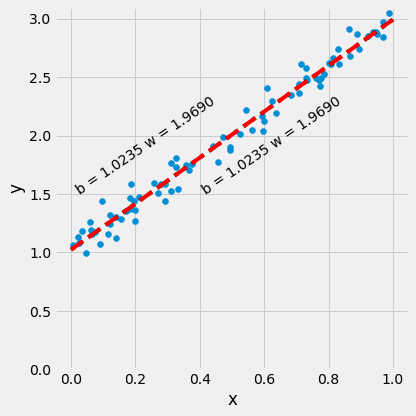

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim([0, 3.1])

# Dataset
ax.scatter(x_train, y_train)
fig.tight_layout()

x_range = np.linspace(0, 1, 101)

regression = LinearRegression()
regression.fit(x_train, y_train)
b_minimum, w_minimum = regression.intercept_[0], regression.coef_[0][0]

yhat_range = b_minimum + w_minimum * x_range
ax.plot(x_range, yhat_range, label='Final model\'s predictions', c='k', linestyle=':')
ax.annotate('b = {:.4f} w = {:.4f}'.format(b_minimum, w_minimum), xy=(.4, 1.5), c='k', rotation=34)

yhat_pred = b + w * x_range
ax.plot(x_range, yhat_pred, label='Final model\'s predictions', c='k', linestyle='--',color='r')
ax.annotate('b = {:.4f} w = {:.4f}'.format(b[0], w[0]), xy=(.01, 1.5), c='k', rotation=34,color='r')

# PyTorch

In [ ]:
scalar = torch.tensor(1.1234)
vector = torch.tensor([1,2,3])
matrix = torch.ones((2,3), dtype = torch.float)
tensor = torch.randn((2,3,4),dtype = torch.float)

In [ ]:
print(scalar)
print(vector)
print(matrix)
print(tensor)

tensor(1.1234)
tensor([1, 2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[[ 0.0419, -0.4149,  1.8258,  0.1699],
         [ 0.0799, -1.0878,  0.1681,  0.7791],
         [ 0.1440,  1.2891, -1.0683,  0.7226]],

        [[-1.4702, -2.4287,  0.7222, -0.3806],
         [ 0.0758,  0.4227,  0.1907, -0.9767],
         [-1.0449,  0.1356,  0.5146,  1.0343]]])


# convert numpy to tensor 

In [ ]:
x_train_tensor = torch.as_tensor(x_train).float().to('cuda:0')

In [ ]:
y_train_tensor = torch.as_tensor(y_train).float().to('cuda:0')

In [ ]:
x_train.dtype, x_train_tensor.dtype

(dtype('float64'), torch.float32)

In [ ]:
x_train.shape, x_train_tensor.shape

((80, 1), torch.Size([80, 1]))

In [ ]:
dummy_array = np.array([1,2,3])
dummy_tensor = torch.as_tensor(dummy_array)
dummy_array

array([1, 2, 3])

In [ ]:
dummy_tensor

tensor([1, 2, 3])

In [ ]:
dummy_array[0]=5
dummy_tensor

tensor([5, 2, 3])

# creating parameters

In [ ]:
#initialization of parameters

torch.manual_seed(42)
b = torch.randn(1, requires_grad = True, dtype = torch.float, device = 'cuda:0')
w = torch.randn(1, requires_grad = True, dtype = torch.float, device = 'cuda:0')
print(b, w)

tensor([0.1940], device='cuda:0', requires_grad=True) tensor([0.1391], device='cuda:0', requires_grad=True)


# autograd

In [ ]:
yhat = b+ w * x_train_tensor

In [ ]:
error = (yhat - y_train_tensor)
loss = (error ** 2 ).mean()

loss.backward()

In [ ]:
print(error.requires_grad)
print(yhat.requires_grad)
print(b.requires_grad)
print(w.requires_grad)
print(y_train_tensor.requires_grad)
print(x_train_tensor.requires_grad)

True
True
True
True
False
False


In [ ]:
print(b.grad, w.grad)

tensor([-3.3881], device='cuda:0') tensor([-1.9439], device='cuda:0')


# updating parameters in code

### first attempt leads to Attribute Error

In [ ]:
lr = 0.1
torch.manual_seed(42)

b = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')
w = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')

n_epochs = 1000

for epoch in range(n_epochs):
  yhat = b+w * x_train_tensor

  error = (yhat-y_train_tensor)
  loss = (error ** 2).mean()

  loss.backward()

  b = b - lr * b.grad
  w = w - lr * w.grad

print(b,w)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1104: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:475.)
  return self._grad


TypeError: ignored

### second attempt --> RuntimeError

In [ ]:
lr = 0.1
torch.manual_seed(42)

b = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')
w = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')

n_epochs = 1000

for epoch in range(n_epochs):
  yhat = b+w * x_train_tensor

  error = (yhat-y_train_tensor)
  loss = (error ** 2).mean()

  loss.backward()

  b -= lr * b.grad
  w -= lr * w.grad

print(b,w)

RuntimeError: ignored

### no_grad solves the problem

In [ ]:
lr = 0.1
torch.manual_seed(42)

b = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')
w = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')

n_epochs = 1000

for epoch in range(n_epochs):
  yhat = b+w * x_train_tensor

  error = (yhat-y_train_tensor)
  loss = (error ** 2).mean()

  loss.backward()
  with torch.no_grad():
    b -= lr * b.grad
    w -= lr * w.grad

print(b,w)

tensor([-0.0068], device='cuda:0', requires_grad=True) tensor([2.6594], device='cuda:0', requires_grad=True)


### no grad and non cumulative gradiatns

In [ ]:
lr = 0.1
torch.manual_seed(42)

b = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')
w = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')

n_epochs = 1000

for epoch in range(n_epochs):
  yhat = b+w * x_train_tensor

  error = (yhat-y_train_tensor)
  loss = (error ** 2).mean()

  loss.backward()
  with torch.no_grad():
    b -= lr * b.grad
    w -= lr * w.grad
  
  b.grad.zero_()
  w.grad.zero_()

print(b,w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


# Dynamic Computation Graph

In [ ]:
torch.manual_seed(42)

b = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')
w = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')

yhat = b + w * x_train_tensor

error = (yhat - y_train_tensor)
loss = (error ** 2).mean()

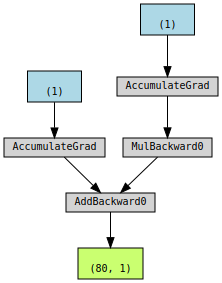

In [ ]:
make_dot(yhat)

# Optimizer 
SSD, MSpop, Adam

### step/Zero_gad

In [ ]:
#stochastic gradient descent - SGD

lr = 0.1
torch.manual_seed(42)

b = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')
w = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')

optimizer = optim.SGD([b,w],lr=lr)

n_epochs = 1000

for epoch in range(n_epochs):
  yhat = b+w * x_train_tensor

  error = (yhat-y_train_tensor)
  loss = (error ** 2).mean()

  loss.backward()
#  with torch.no_grad():
#    b -= lr * b.grad
#    w -= lr * w.grad

  optimizer.step()

  #b.grad.zero_()
  #w.grad.zero_()
  optimizer.zero_grad()

print(b,w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


# Loss

In [ ]:
loss_fn = nn.MSELoss(reduction = 'mean')
loss_fn

MSELoss()

In [ ]:
#stochastic gradient descent - SGD

lr = 0.1
torch.manual_seed(42)

b = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')
w = torch.randn(1, requires_grad = True, dtype=torch.float, device='cuda:0')

optimizer = optim.SGD([b,w],lr=lr)

loss_fn = nn.MSELoss(reduction='mean')
n_epochs = 1000

for epoch in range(n_epochs):
  yhat = b+w * x_train_tensor

  error = (yhat-y_train_tensor)
  loss = (error ** 2).mean()

  loss.backward()
#  with torch.no_grad():
#    b -= lr * b.grad
#    w -= lr * w.grad

  optimizer.step()

  #b.grad.zero_()
  #w.grad.zero_()
  optimizer.zero_grad()

print(b,w)

tensor([1.0235], device='cuda:0', requires_grad=True) tensor([1.9690], device='cuda:0', requires_grad=True)


In [ ]:
loss

tensor(0.0080, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
loss.detach().cpu().numpy()

array(0.00804466, dtype=float32)

# Model

In [ ]:
class ManualLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.b = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.w = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x):
    return self.b + self.w*x



In [ ]:
torch.manual_seed(42)
dummy = ManualLinearRegression()
list(dummy.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

### state_dict

In [ ]:
dummy.state_dict()

OrderedDict([('b', tensor([0.3367])), ('w', tensor([0.1288]))])

In [ ]:
optimizer.state_dict()

{'param_groups': [{'dampening': 0,
   'lr': 0.1,
   'maximize': False,
   'momentum': 0,
   'nesterov': False,
   'params': [0, 1],
   'weight_decay': 0}],
 'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}}}

### forward pass

In [ ]:
lr = 0.1

torch.manual_seed(42)
model = ManualLinearRegression().to('cuda:0')

optimizer = optim.SGD(model.parameters(), lr=lr)

loss_fn = nn.MSELoss(reduction='mean')

n_epochs = 1000

for epoch in range(n_epochs):
  model.train()

  yhat = model(x_train_tensor)
  loss = loss_fn(yhat, y_train_tensor)

  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

print(model.state_dict())

OrderedDict([('b', tensor([1.0235], device='cuda:0')), ('w', tensor([1.9690], device='cuda:0'))])


### train

### nested models

In [ ]:
class MyLinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.Linear = nn.Linear(1,1)
  
  def forward(self,x):
    self.Linear(x)



In [ ]:
torch.manual_seed(42)
dummy2 = MyLinearRegression().to('cuda:0')

list(dummy2.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [ ]:
dummy2.state_dict()

OrderedDict([('Linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('Linear.bias', tensor([0.8300], device='cuda:0'))])

### sequential models

In [ ]:
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(1,1).to('cuda:0'))

model.state_dict()

OrderedDict([('0.weight', tensor([[0.7645]], device='cuda:0')),
             ('0.bias', tensor([0.8300], device='cuda:0'))])

# Layers

In [ ]:
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(3,5), nn.Linear(5,1)).to('cuda:0')
model.state_dict()

OrderedDict([('0.weight', tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530]], device='cuda:0')),
             ('1.bias', tensor([-0.2062], device='cuda:0'))])

In [ ]:
torch.manual_seed(42)
model_22 = nn.Sequential(nn.Linear(3,5), nn.Linear(5,2)).to('cuda:0')
model_22.state_dict()

OrderedDict([('0.weight', tensor([[ 0.4414,  0.4792, -0.1353],
                      [ 0.5304, -0.1265,  0.1165],
                      [-0.2811,  0.3391,  0.5090],
                      [-0.4236,  0.5018,  0.1081],
                      [ 0.4266,  0.0782,  0.2784]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0815,  0.4451,  0.0853, -0.2695,  0.1472], device='cuda:0')),
             ('1.weight',
              tensor([[-0.2060, -0.0524, -0.1816,  0.2967, -0.3530],
                      [-0.2062, -0.1263, -0.2689,  0.0422, -0.4417]], device='cuda:0')),
             ('1.bias', tensor([ 0.4039, -0.3799], device='cuda:0'))])

In [ ]:
torch.manual_seed(42)

model_33 = nn.Sequential()
model_33.add_module('layer 1', nn.Linear(3,5))
model_33.add_module('layer 2', nn.Linear(5,1))

model.to('cuda:0')

Sequential(
  (0): Linear(in_features=3, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

### data geeneration

In [92]:
%%writefile data_generation/simple_linear_regression.py

import numpy as np

true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
y = true_b + true_w * x + (.1 * np.random.randn(N, 1))

# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

Writing data_generation/simple_linear_regression.py


### Data Preparation

In [ ]:
%%writefile data_preparation/v0.py

device = 'cuda:0'

x_train_tensor = torch.as_tensor(x_train).float().to(device)
y_train_tensor = torch.as_tensor(y_train).float().to(device)


Writing data_preparation/v0.py


In [ ]:
%run -i data_preparation/v0.py

### model configuration

In [ ]:
%%writefile model_configuration/v0.py
device = 'cuda:0'

lr = 0.1

torch.manual_seed(42)

model = nn.Sequential(nn.Linear(1,1)).to(device)

optimizer = optim.SGD(model.parameters(), lr=lr)

loss_fn = nn.MSELoss(reduction='mean')

Writing model_configuration/v0.py


In [ ]:
%run -i model_configuration/v0.py

### model training

In [ ]:
%%writefile model_training/v0.py

n_epochs = 1000

for epoch in range(n_epochs):
  model.train()

  yhat = model(x_train_tensor)
  loss = loss_fn(yhat, y_train_tensor)

  loss.backward()

  optimizer.step()
  optimizer.zero_grad()
  

Writing model_training/v0.py


In [ ]:
%run -i model_training/v0.py

In [ ]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9690]], device='cuda:0')), ('0.bias', tensor([1.0235], device='cuda:0'))])
